In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import ydata_profiling as yd


In [7]:
# Load the dataset
df = pd.read_csv("datasets\Month_Value_1.csv", index_col="Period", parse_dates=True)

In [8]:
DataProfile = yd.ProfileReport(df)
DataProfile.to_file("Profile.json")
DataProfile.to_file("Profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Basic exploration
print(df.head())
print(df.info())
print(df.describe())
df.dropna(inplace=True)

                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-01  1.601007e+07         12729.0   1257.763541   
2015-01-02  1.580759e+07         11636.0   1358.507000   
2015-01-03  2.204715e+07         15922.0   1384.697024   
2015-01-04  1.881458e+07         15227.0   1235.606705   
2015-01-05  1.402148e+07          8620.0   1626.621765   

            The_average_annual_payroll_of_the_region  
Period                                                
2015-01-01                                30024676.0  
2015-01-02                                30024676.0  
2015-01-03                                30024676.0  
2015-01-04                                30024676.0  
2015-01-05                                30024676.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-01-12
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------    

In [3]:
# for column in df.columns: print(df.columns[df.columns == column])
for column in df.columns: print(column, df.columns.get_loc(column))

Revenue 0
Sales_quantity 1
Average_cost 2
The_average_annual_payroll_of_the_region 3


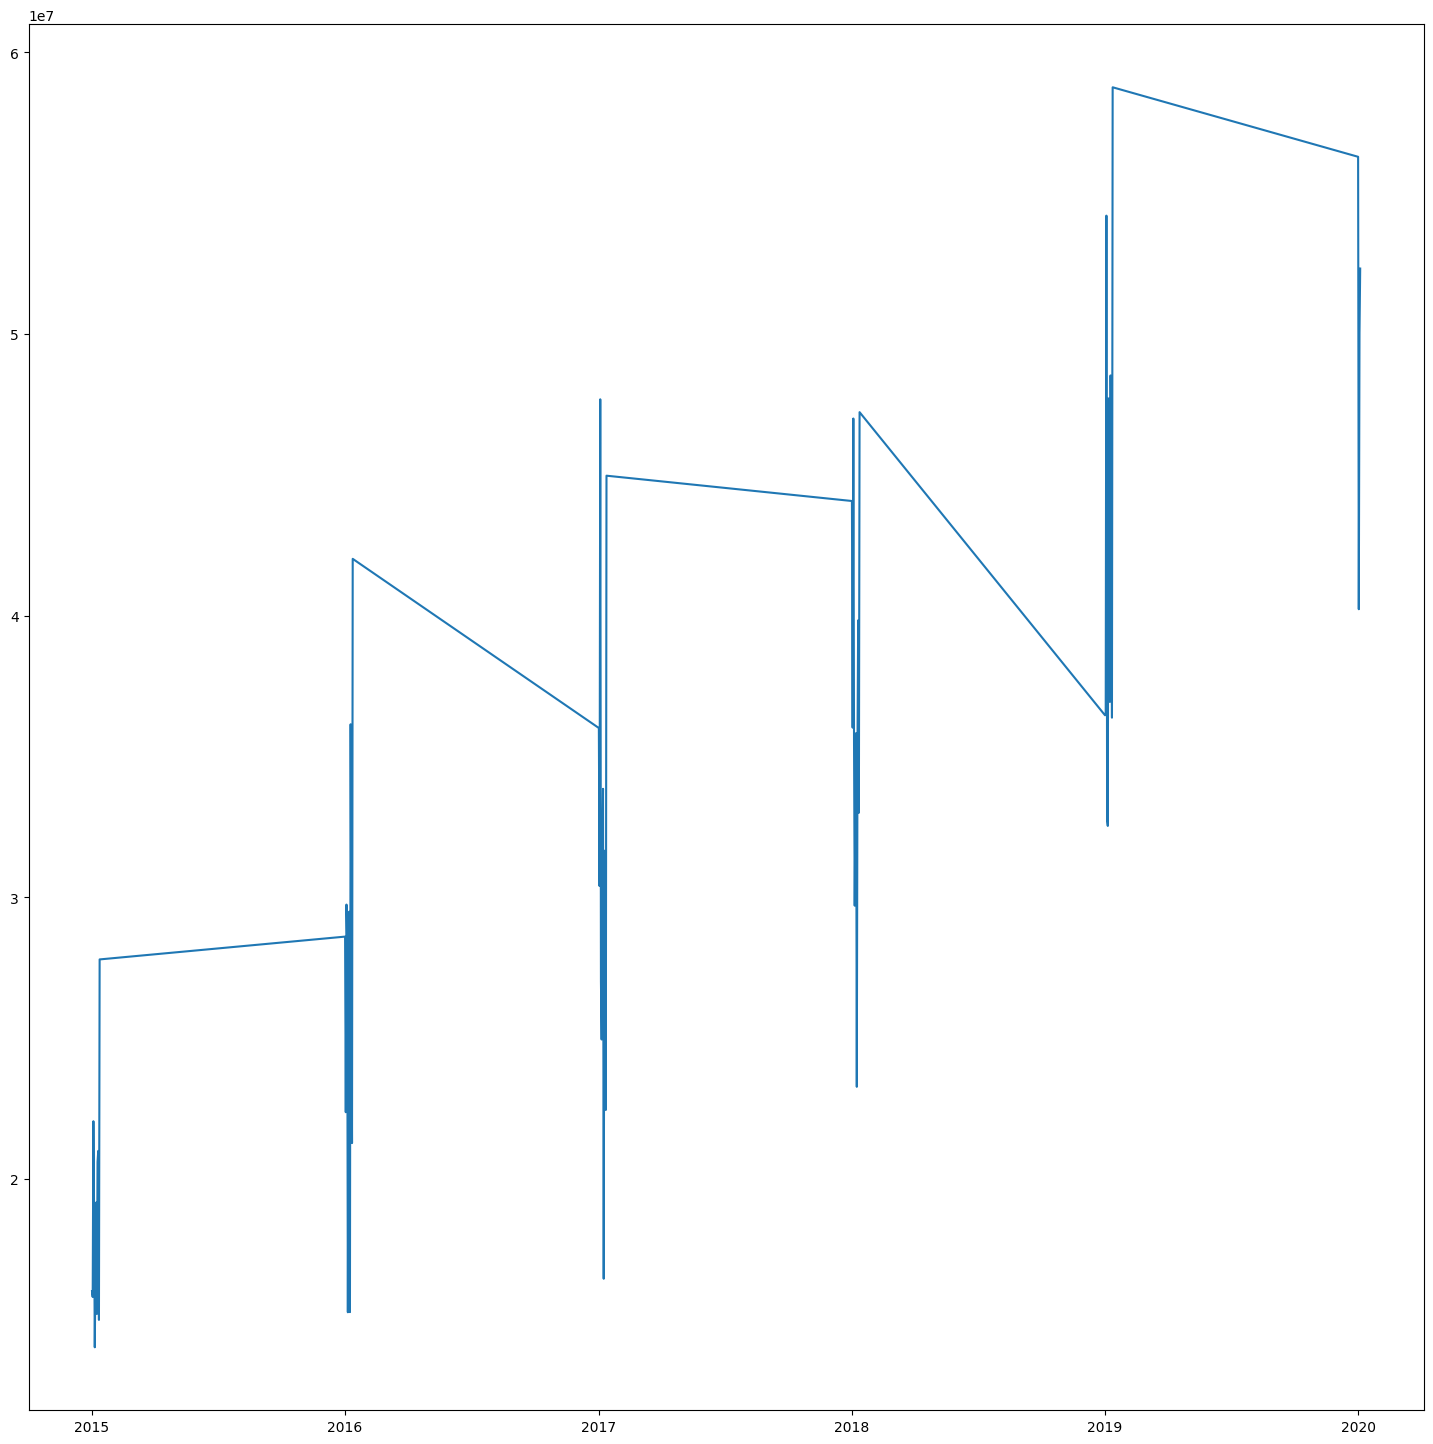

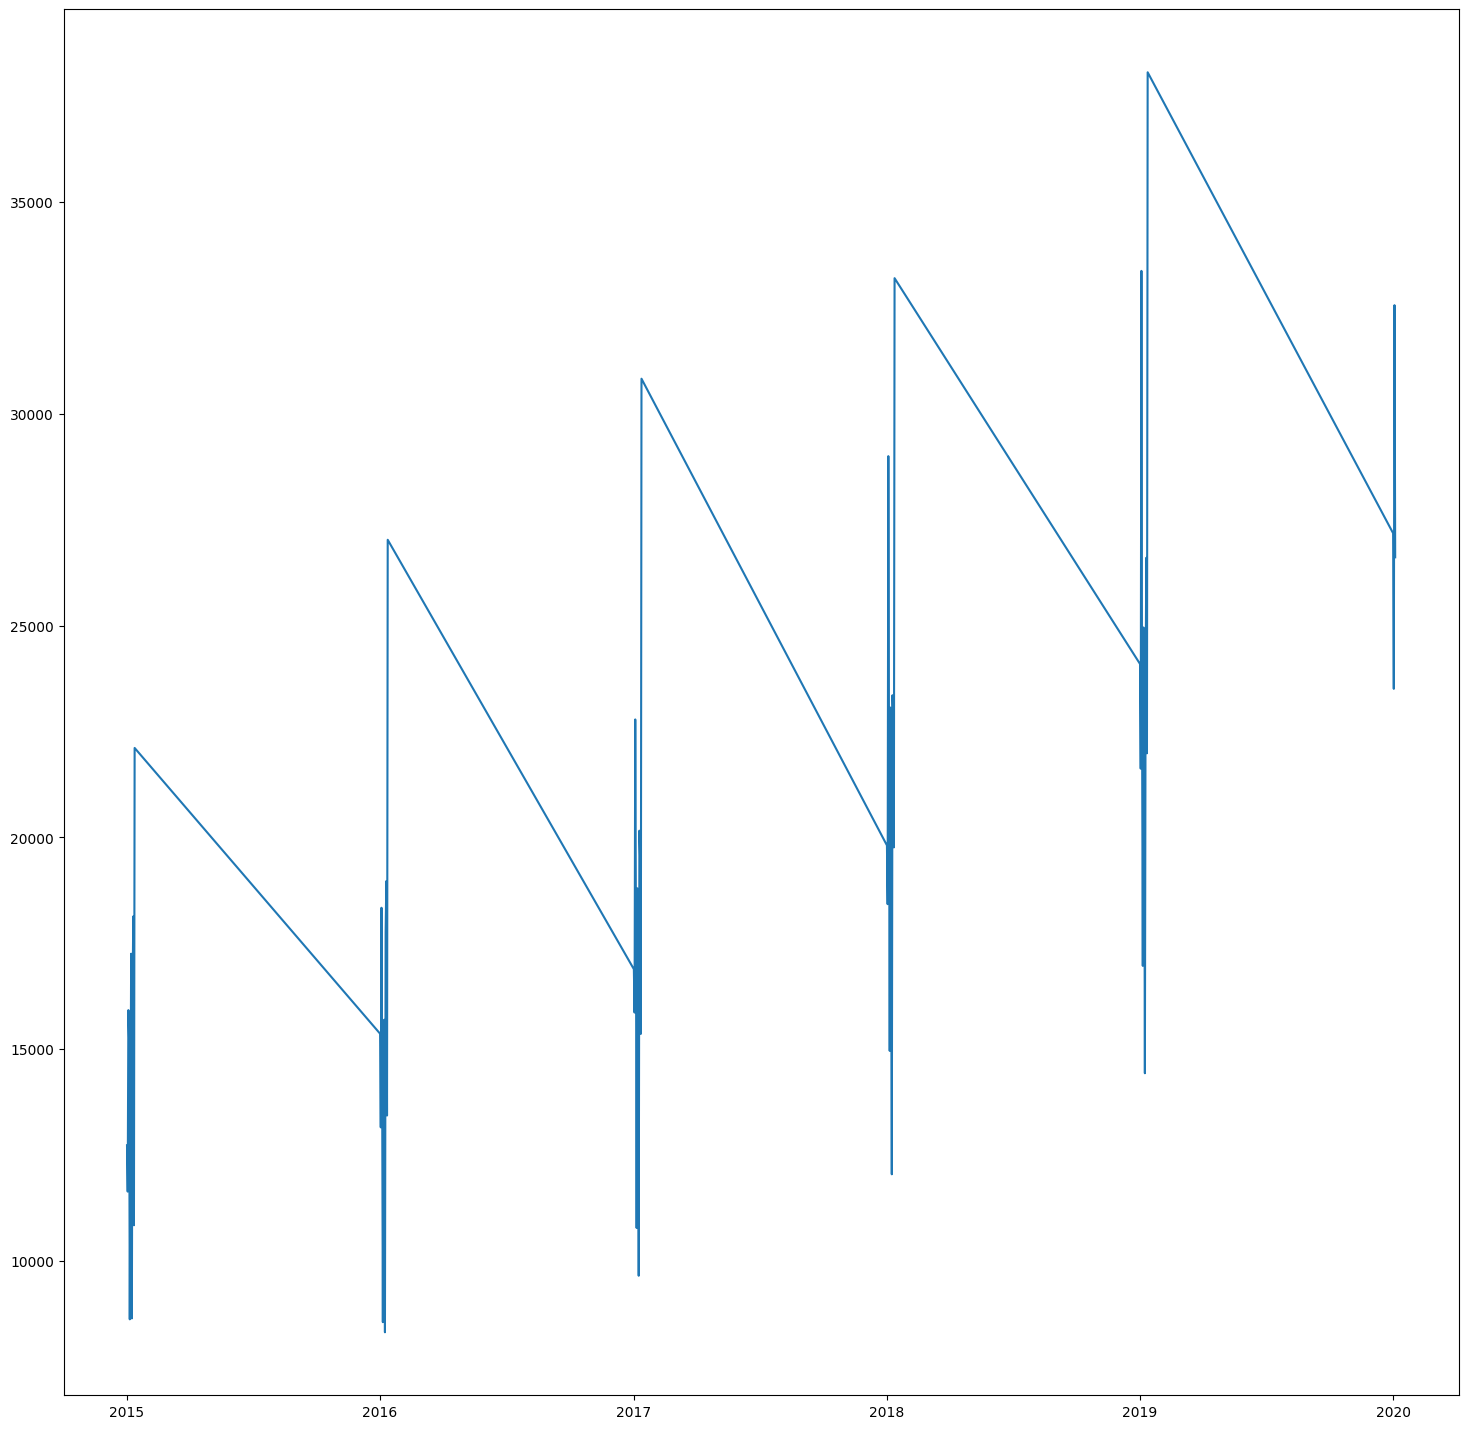

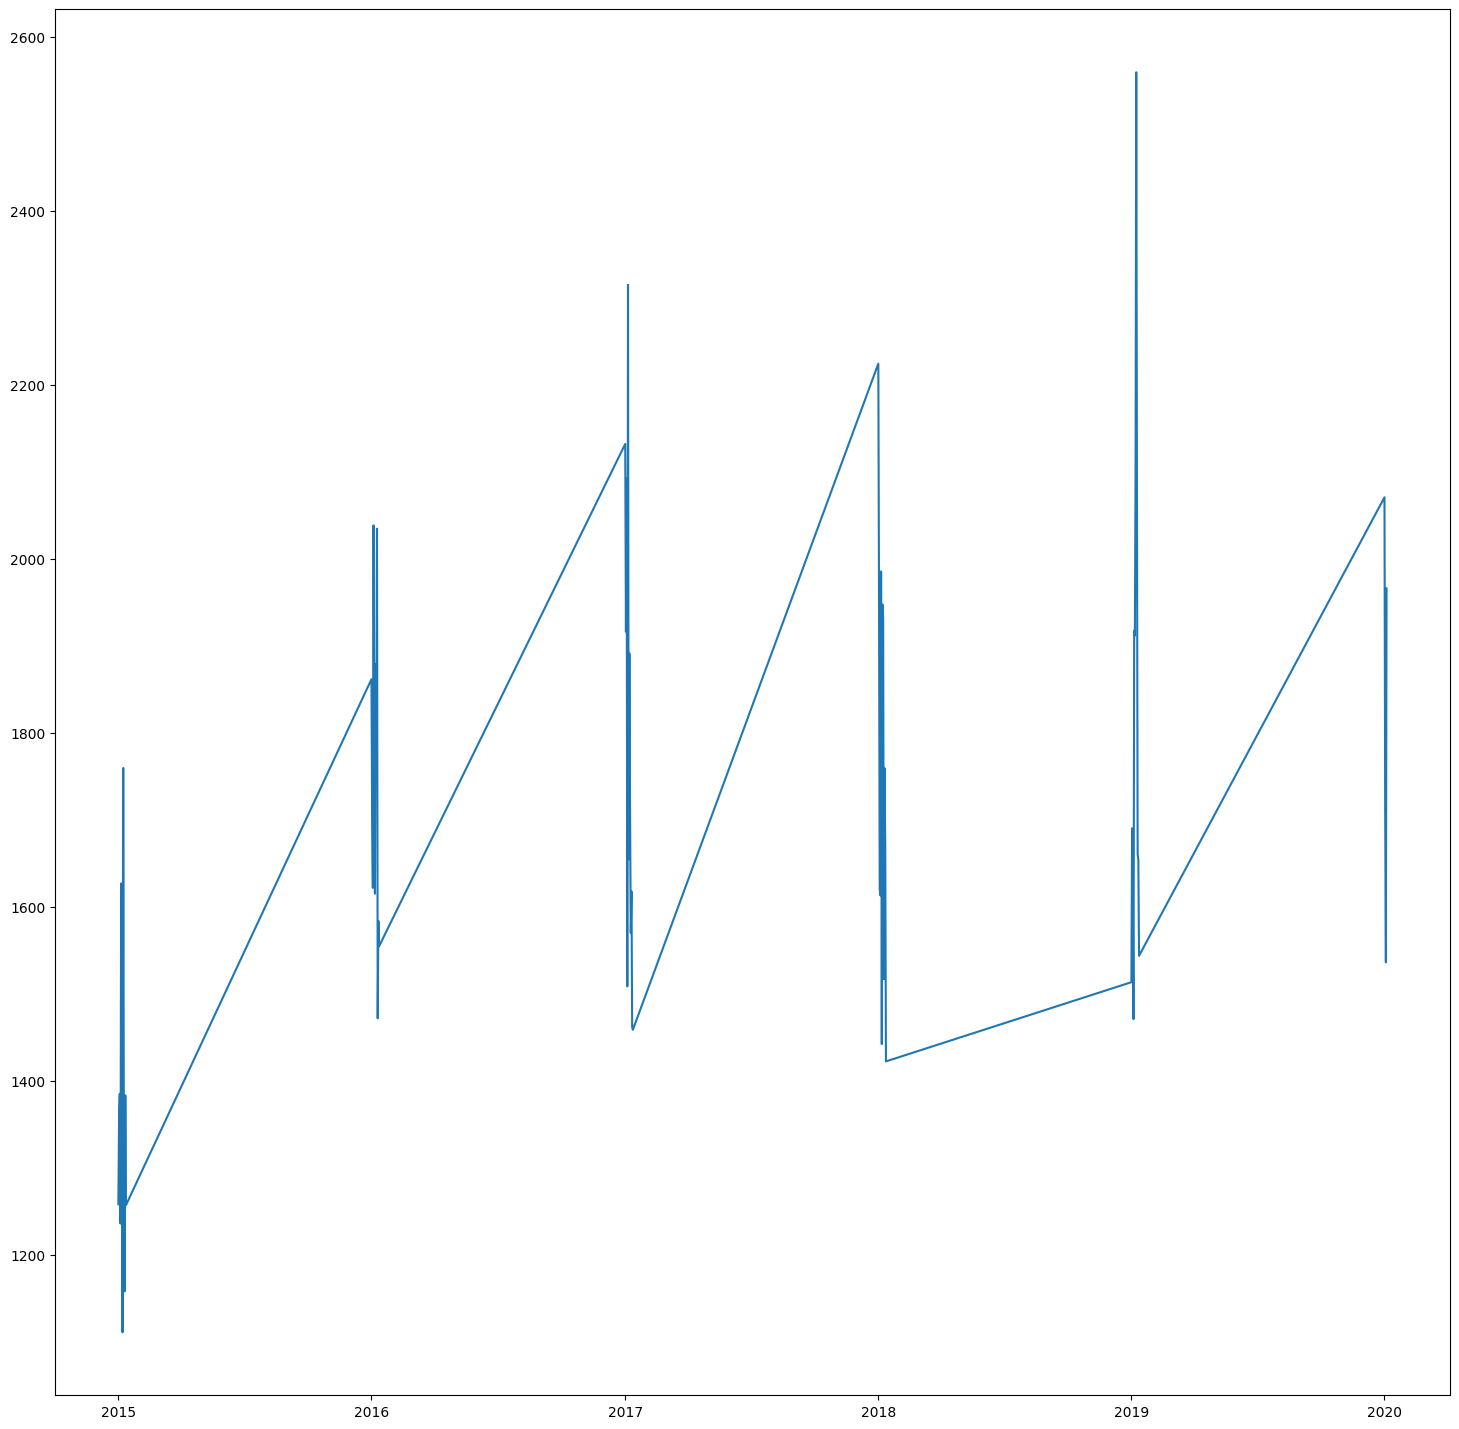

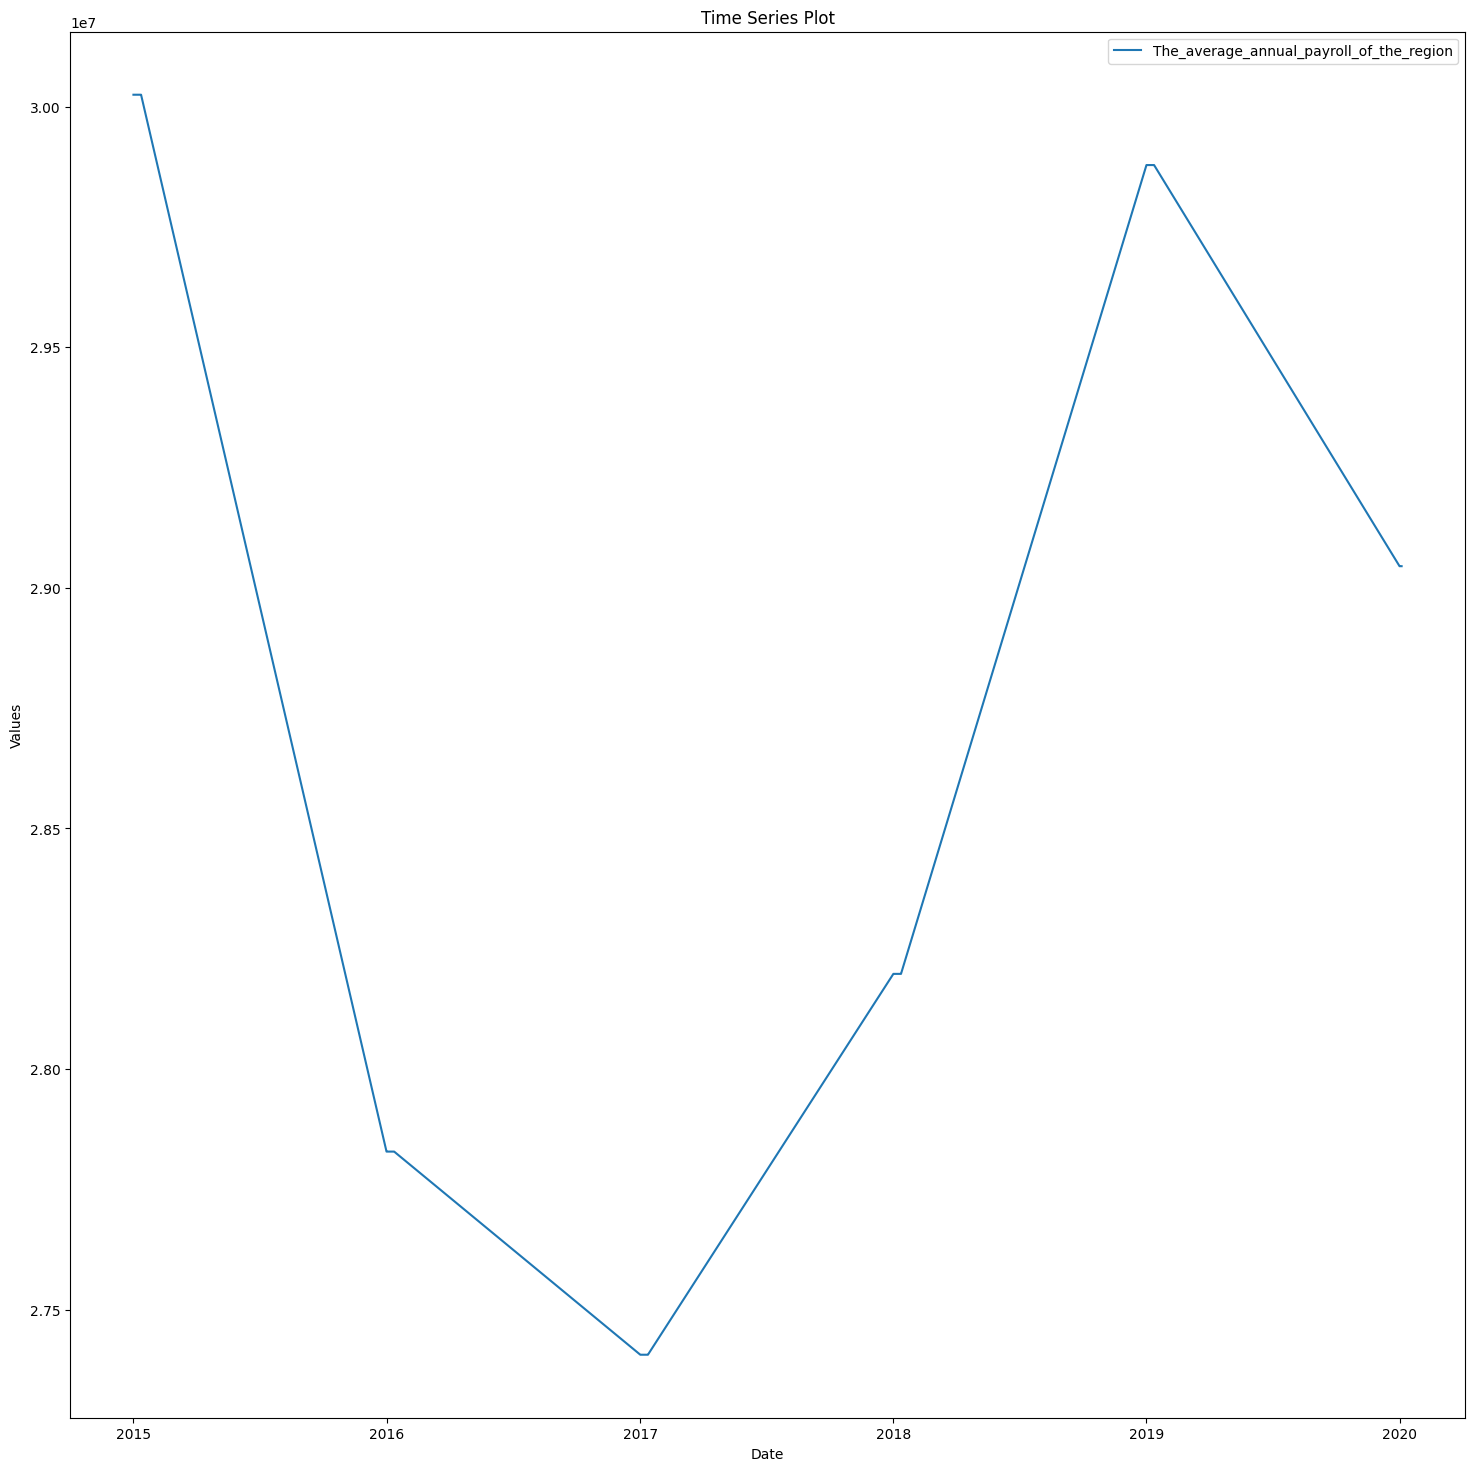

In [4]:
for column in df.columns:
    plt.figure(df.columns.get_loc(column)+1,figsize=(18, 18))
    plt.plot(df.index, df[column], label=column)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()



Analyzing column: Revenue
ADF Statistic for Revenue: -0.26914893564362996
p-value for Revenue: 0.9297615379617786


<Figure size 2000x1400 with 0 Axes>

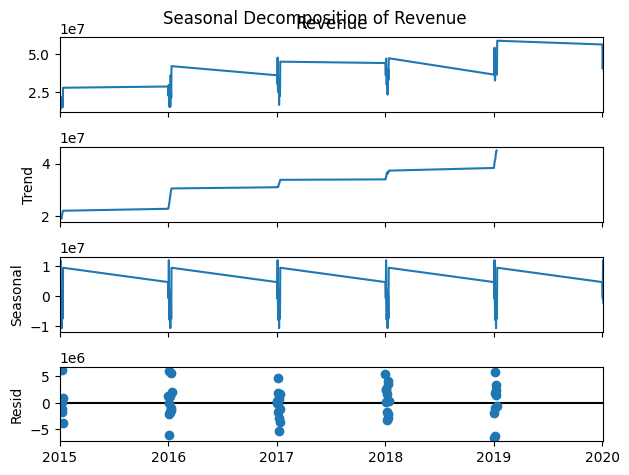


Analyzing column: Sales_quantity
ADF Statistic for Sales_quantity: 1.1570562060945375
p-value for Sales_quantity: 0.9956753282590142


<Figure size 2000x1400 with 0 Axes>

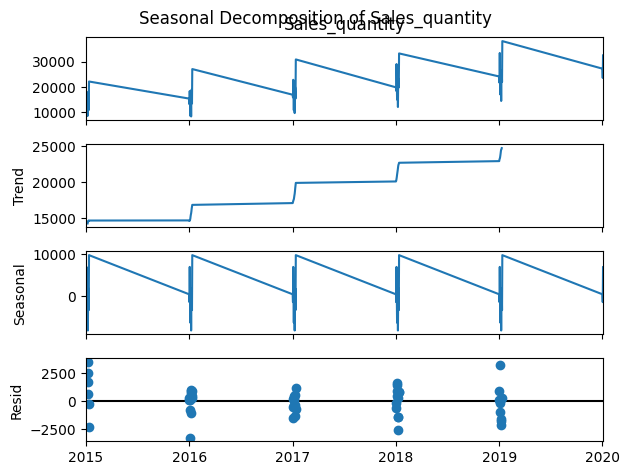


Analyzing column: Average_cost
ADF Statistic for Average_cost: -5.751134561254756
p-value for Average_cost: 5.962883288959485e-07


<Figure size 2000x1400 with 0 Axes>

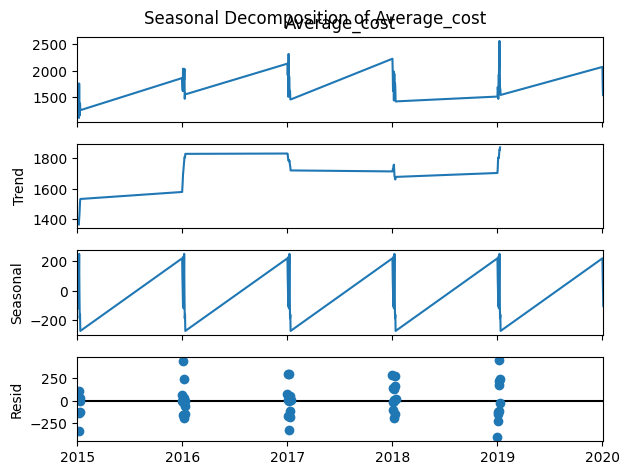


Analyzing column: The_average_annual_payroll_of_the_region
ADF Statistic for The_average_annual_payroll_of_the_region: -1.705837113111716
p-value for The_average_annual_payroll_of_the_region: 0.4281075578397735


<Figure size 2000x1400 with 0 Axes>

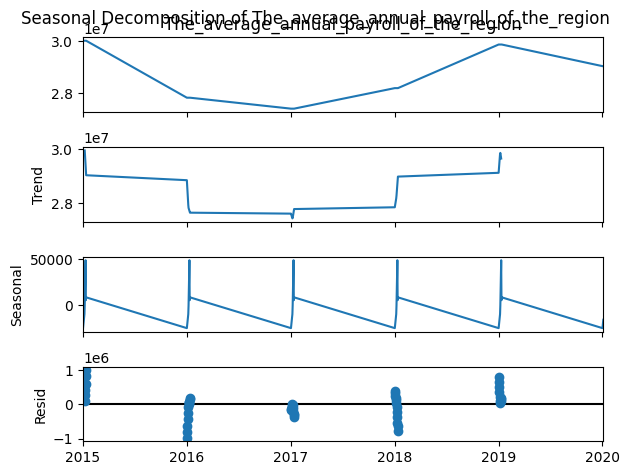

In [5]:

for column in df.columns:
    print(f"\nAnalyzing column: {column}")
    plt.figure(figsize=(20,14))
    # ADF Test
    adf_result = adfuller(df[column])
    print(f"ADF Statistic for {column}: {adf_result[0]}")
    print(f"p-value for {column}: {adf_result[1]}")

    # Seasonal Decompose
    decomposition = seasonal_decompose(df[column], model='additive', period=12)
    decomposition.plot()
    plt.suptitle(f'Seasonal Decomposition of {column}')
    plt.show()


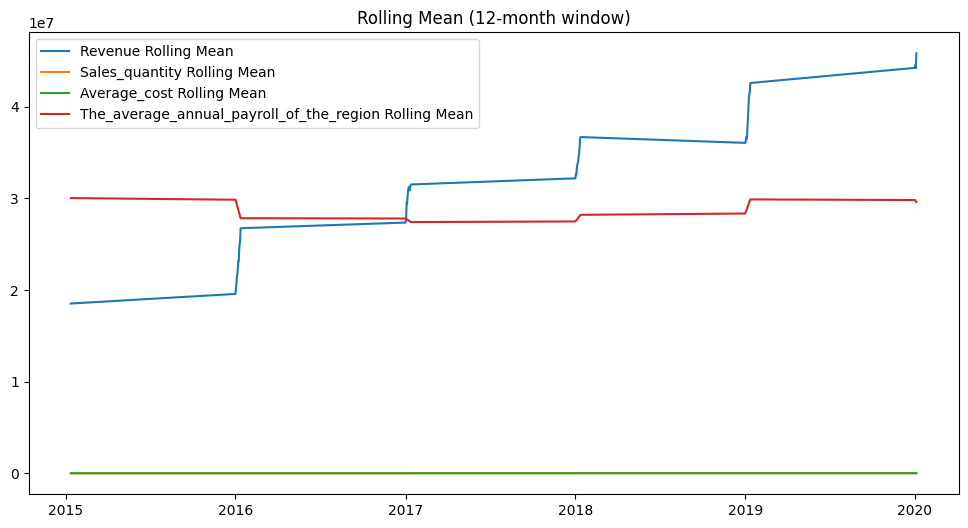

In [30]:
rolling_means = df.rolling(window=12).mean()

plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(rolling_means.index, rolling_means[column], label=f'{column} Rolling Mean')
plt.title('Rolling Mean (12-month window)')
plt.legend()
plt.show()


Correlation Matrix:
                                           Revenue  Sales_quantity  \
Revenue                                   1.000000        0.887570   
Sales_quantity                            0.887570        1.000000   
Average_cost                              0.358278       -0.093599   
The_average_annual_payroll_of_the_region -0.007111        0.103704   

                                          Average_cost  \
Revenue                                       0.358278   
Sales_quantity                               -0.093599   
Average_cost                                  1.000000   
The_average_annual_payroll_of_the_region     -0.305145   

                                          The_average_annual_payroll_of_the_region  
Revenue                                                                  -0.007111  
Sales_quantity                                                            0.103704  
Average_cost                                                             -0.305145 

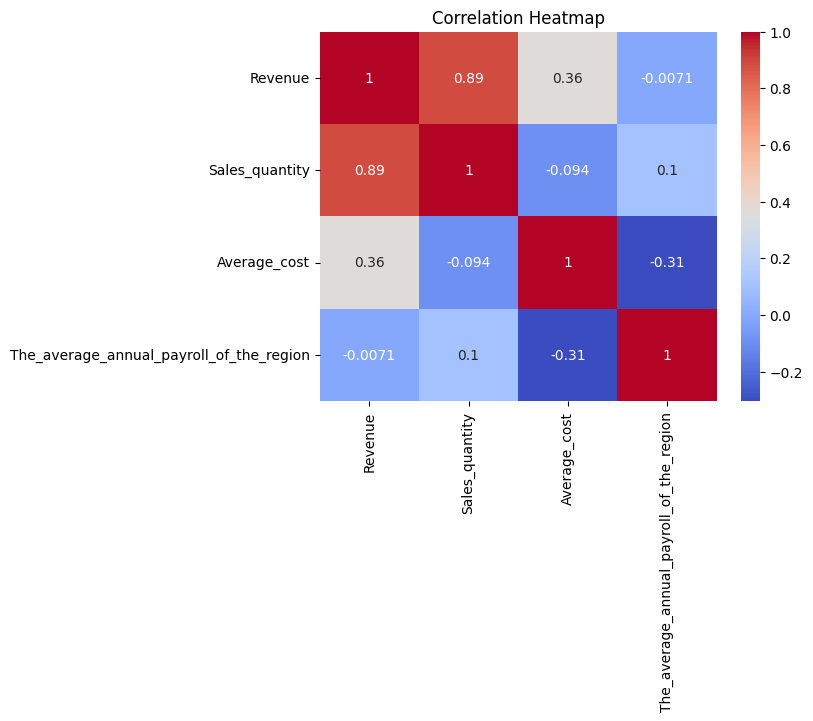

In [31]:
df_corr = df.corr()
print("Correlation Matrix:")
print(df_corr)

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


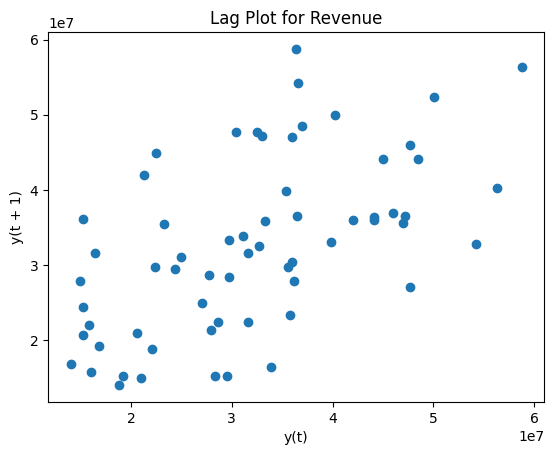

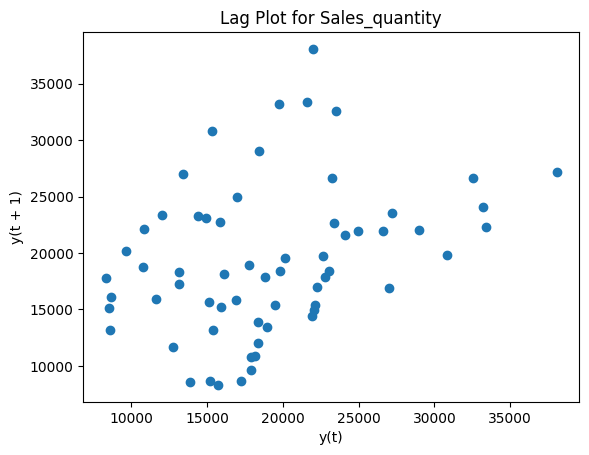

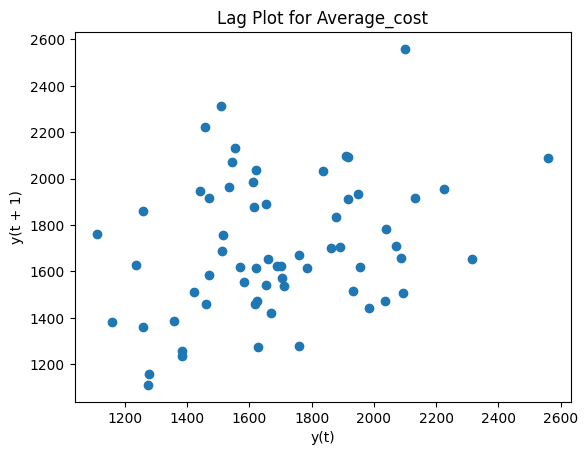

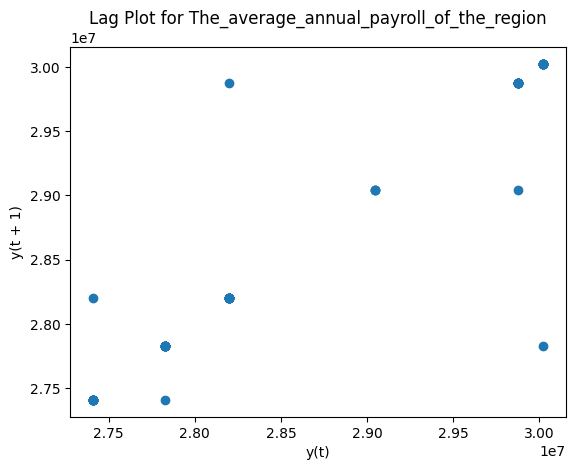

In [32]:
for column in df.columns:
    plt.figure()
    lag_plot(df[column])
    plt.title(f'Lag Plot for {column}')
    plt.show()


Autocorrelation and Partial Autocorrelation for Revenue


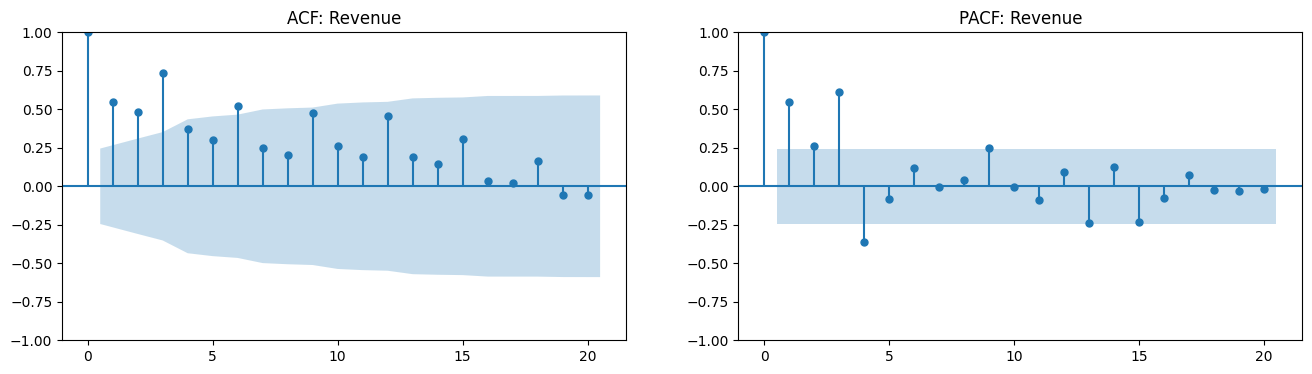

Autocorrelation and Partial Autocorrelation for Sales_quantity


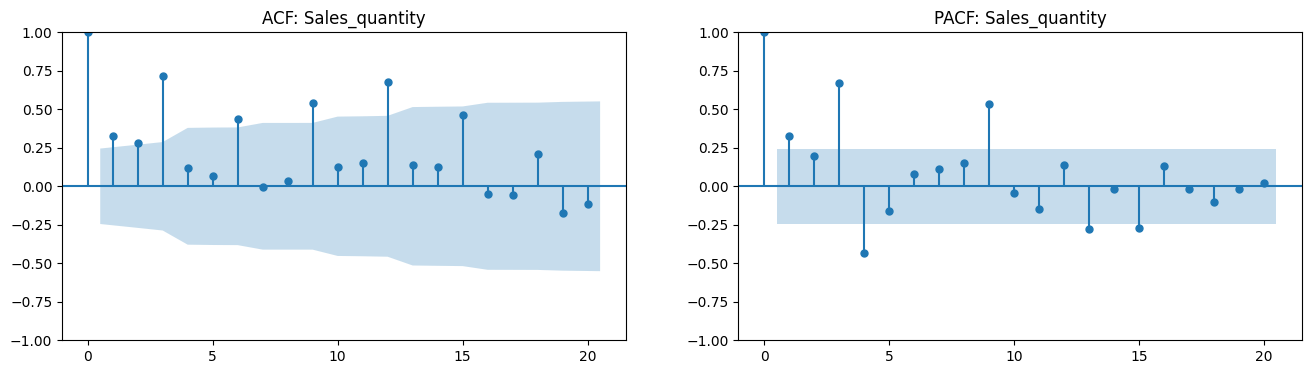

Autocorrelation and Partial Autocorrelation for Average_cost


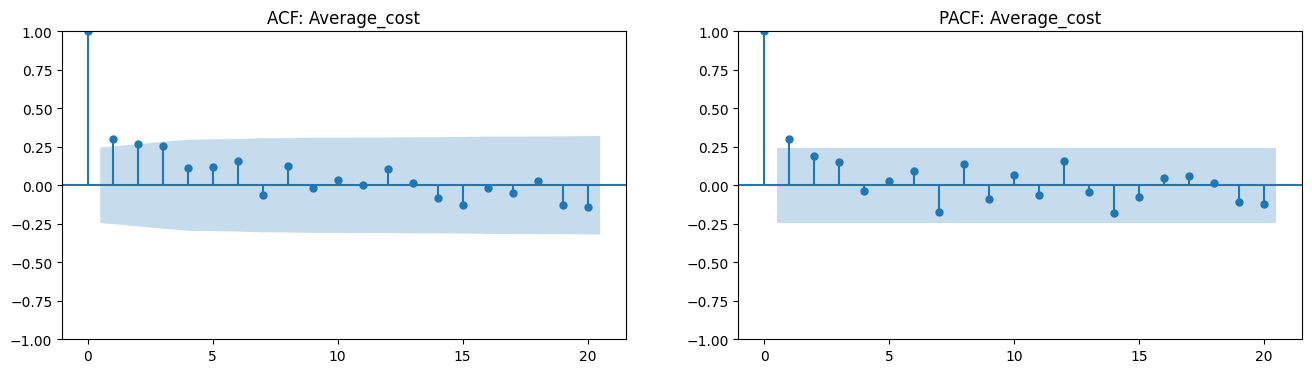

Autocorrelation and Partial Autocorrelation for The_average_annual_payroll_of_the_region


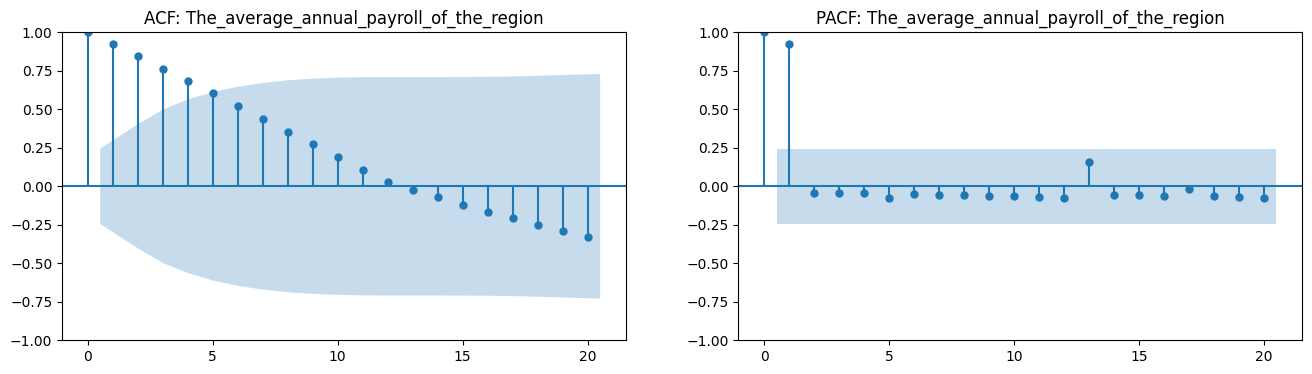

In [33]:
for column in df.columns:
    print(f"Autocorrelation and Partial Autocorrelation for {column}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(df[column], ax=axes[0], lags=20, title=f'ACF: {column}')
    plot_pacf(df[column], ax=axes[1], lags=20, title=f'PACF: {column}')
    plt.show()

Autocorrelation and Partial Autocorrelation for Revenue


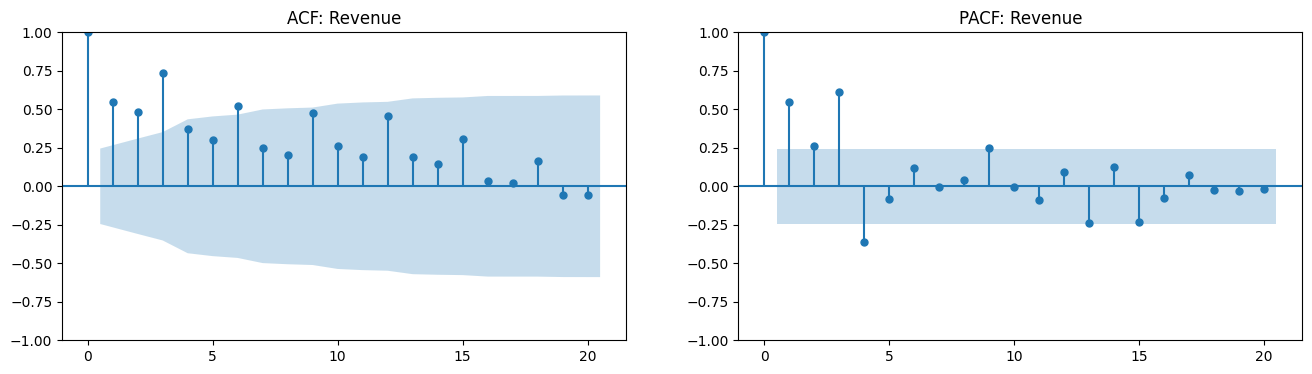

Autocorrelation and Partial Autocorrelation for Sales_quantity


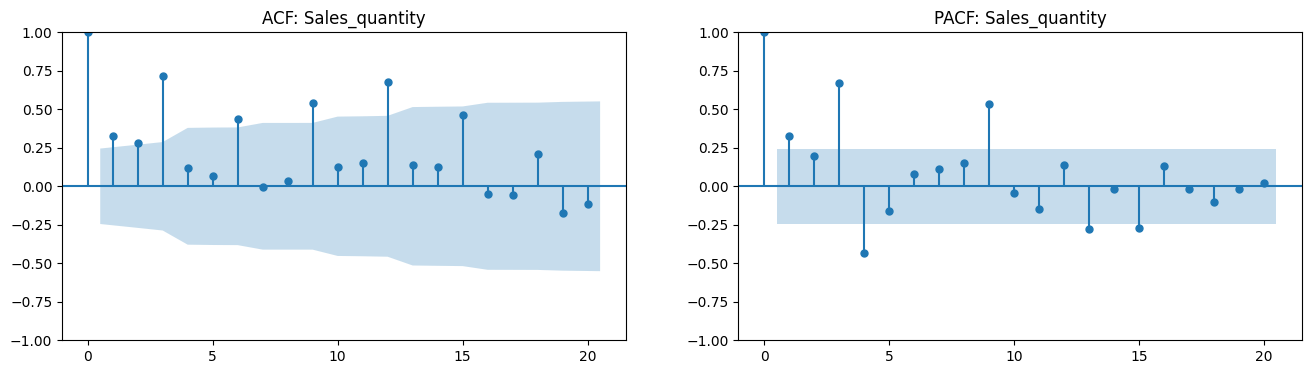

Autocorrelation and Partial Autocorrelation for Average_cost


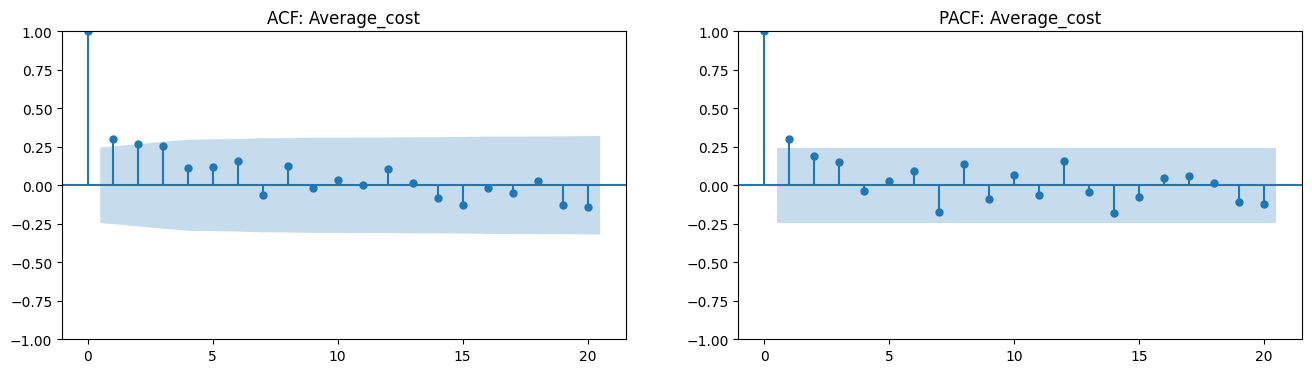

Autocorrelation and Partial Autocorrelation for The_average_annual_payroll_of_the_region


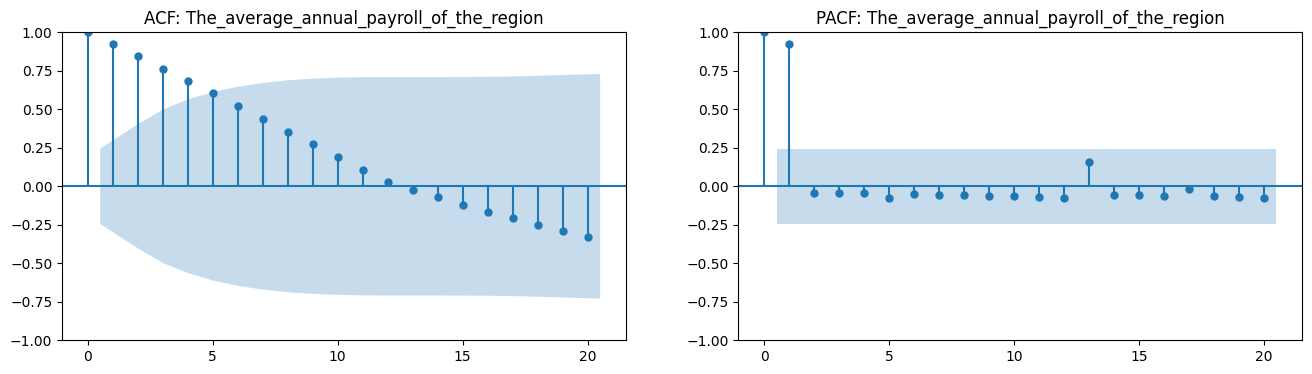

In [34]:
for column in df.columns:
    print(f"Autocorrelation and Partial Autocorrelation for {column}")
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    plot_acf(df[column], ax=axes[0], lags=20, title=f'ACF: {column}')
    plot_pacf(df[column], ax=axes[1], lags=20, title=f'PACF: {column}')
    plt.show()


In [35]:
lagged_df = pd.concat(
    [df.shift(i).add_suffix(f"_lag{i}") for i in range(1, 4)], axis=1  # Lag 1, 2, 3
)
lagged_df = pd.concat([df, lagged_df], axis=1).dropna()
print(lagged_df.head())

                 Revenue  Sales_quantity  Average_cost  \
Period                                                   
2015-01-04  1.881458e+07         15227.0   1235.606705   
2015-01-05  1.402148e+07          8620.0   1626.621765   
2015-01-06  1.678393e+07         13160.0   1275.374508   
2015-01-07  1.916189e+07         17254.0   1110.576805   
2015-01-08  1.520498e+07          8642.0   1759.428870   

            The_average_annual_payroll_of_the_region  Revenue_lag1  \
Period                                                               
2015-01-04                                30024676.0  2.204715e+07   
2015-01-05                                30024676.0  1.881458e+07   
2015-01-06                                30024676.0  1.402148e+07   
2015-01-07                                30024676.0  1.678393e+07   
2015-01-08                                30024676.0  1.916189e+07   

            Sales_quantity_lag1  Average_cost_lag1  \
Period                                          

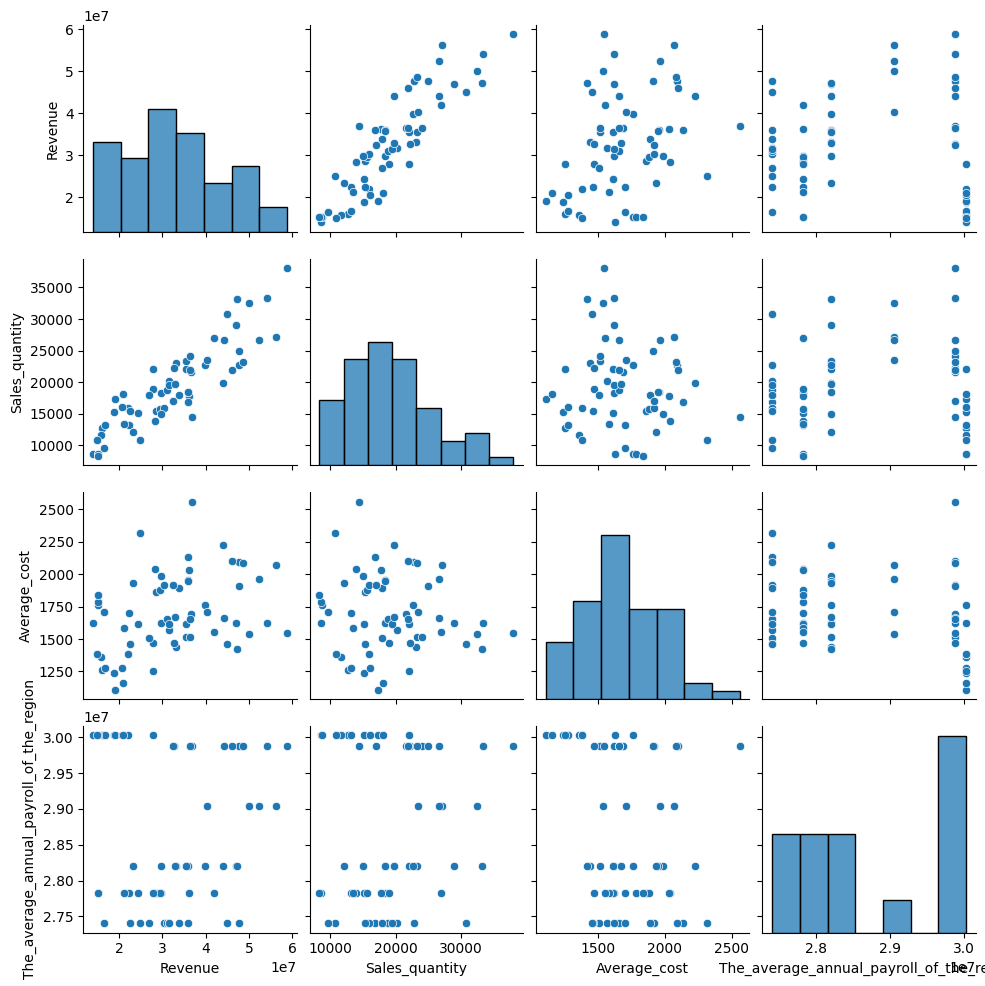

In [36]:
sns.pairplot(df)
plt.show()